In [1]:
import iss
import numpy as np
from matplotlib import pyplot as plt

In [67]:
def brownian(
    T: int,
    dt: float = 1,
    x0: float = 0,
    delta: float = .1,
) -> np.ndarray:
    x = np.random.normal(size=(T,), scale=delta*np.sqrt(dt))
    return np.cumsum(x) + x0

## Words

In [94]:
x = np.random.randn(100, 1)

iss.iss(x, iss.Word("[1][1][1]"), partial=True)

ISS([1], [1][1], [1][1][1])

### Iterated sums of a circle

In [95]:
rn = np.linspace(0, 2*np.pi, 200)

x1 = np.c_[np.cos(rn-np.pi), np.sin(rn)]

rn = np.linspace(-1, 1, 100)

x2 = np.c_[
    np.r_[rn, rn[-2::-1]],
    np.r_[np.sqrt(1-rn**2), -np.sqrt(1-rn[-2::-1]**2)],
]

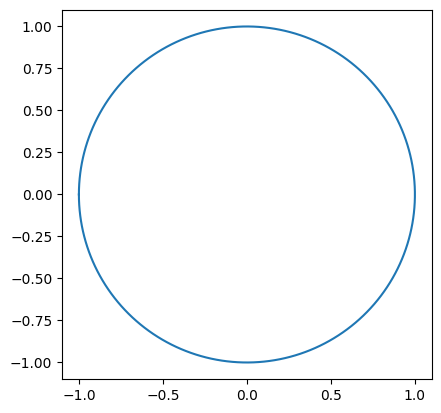

In [96]:
plt.plot(x1[:, 0], x1[:, 1])
plt.gca().set_aspect("equal")

In [105]:
words = []
words.append(iss.words.of_weight(1, 2))
words.append(iss.words.of_weight(2, 2))
words.append(iss.words.of_weight(3, 2))
words.append(iss.words.of_weight(4, 2))
words.append(iss.words.of_weight(5, 2))

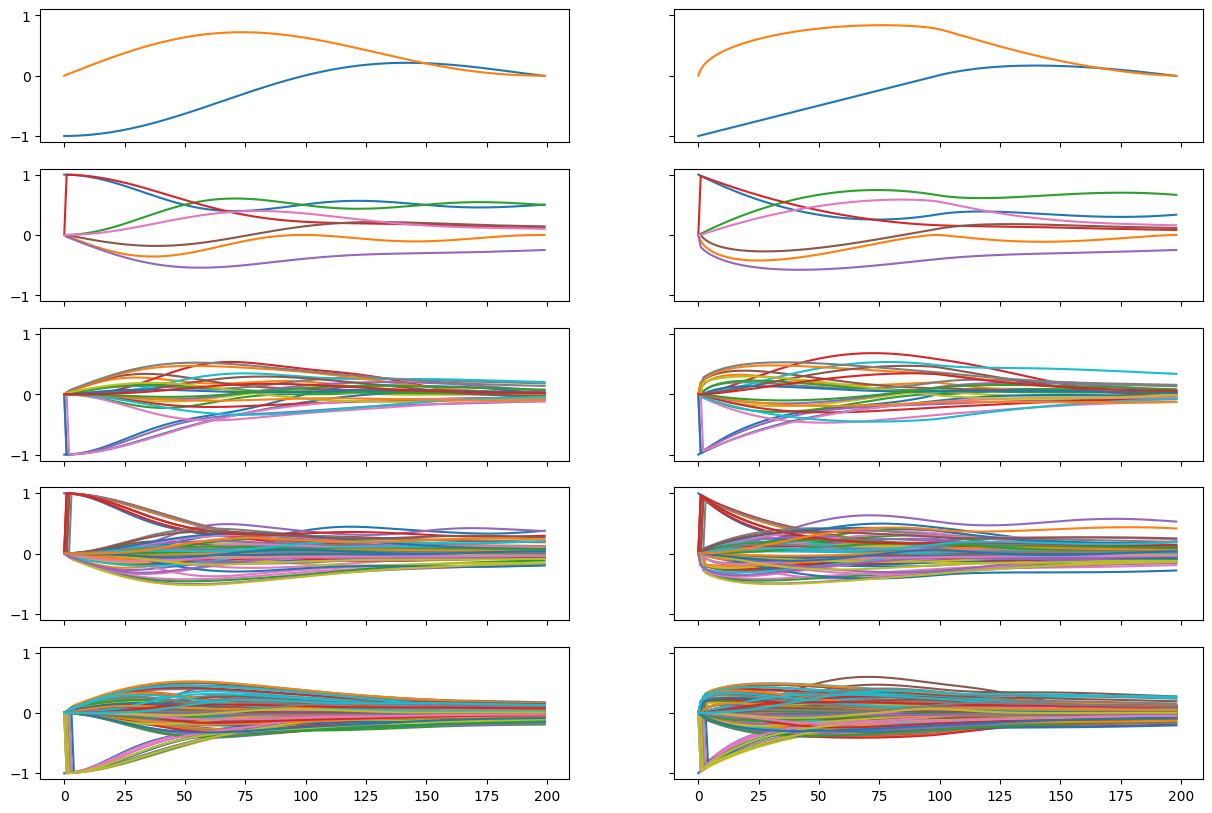

In [108]:
fig, ax = plt.subplots(len(words), 2, figsize=(15, 10),
                       sharey=True, sharex=True)

for i in range(len(words)):
    for word in words[i]:
        ax[i, 0].plot(iss.iss(x1, word, normalize=True), label=f"${word}$")
        ax[i, 1].plot(iss.iss(x2, word, normalize=True), label=f"${word}$")

## Arctic ISS

In [2]:
x = np.array([
    # [1, 3, -4, 2, 0, 5, 1, 1]
    [1, 0, -4, 1, -4, 5],
    [-4, -7, -3, -2, -5, -8],
    [1, 2, 6, 2, 8, 2],
]).swapaxes(0, 1)

In [3]:
iss.cumargmax(x, iss.Word("[1][2][3]"), partial=False)

(array([-2, -1,  4,  4,  7,  7]),
 (array([[0, 0, 0],
         [0, 0, 1],
         [0, 2, 2],
         [0, 2, 2],
         [3, 3, 4],
         [3, 3, 4]], dtype=int32),))

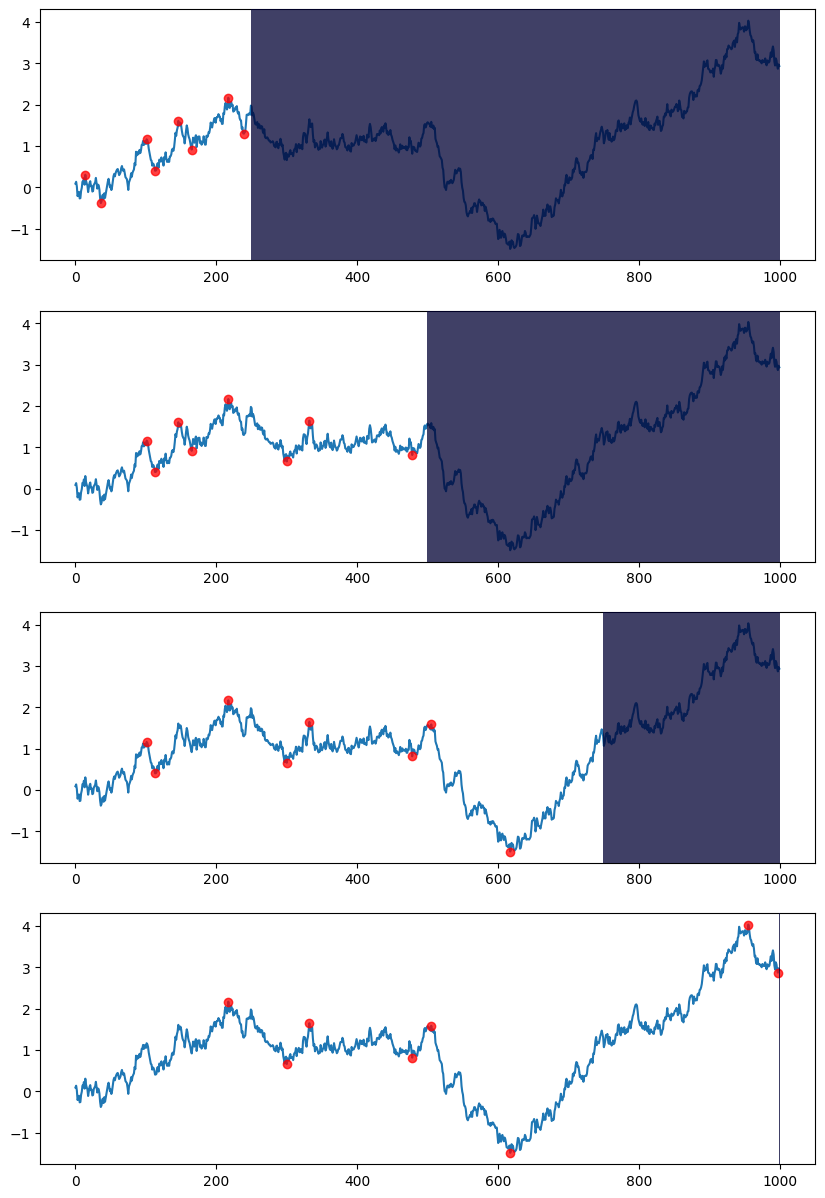

In [109]:
x = brownian(1000)
cm = iss.cumargmax(x, "+-+-+-+-")
up_to = [249, 499, 749, 999]

fig, ax = plt.subplots(len(up_to), 1, figsize=(10, 15))
for i, ut in enumerate(up_to):
    ax[i].plot(x)
    ax[i].plot(cm[1][0][ut], x[cm[1][0][ut]], "o", color=(1, 0, 0, 0.75))
    ax[i].axvspan(ut, 1000, facecolor=(0, 0, 0.2, 0.75), zorder=100)
plt.show()